How to find Tuesdays late in the month?

In [4]:
function getTuesdays(month, year) {
    var d = new Date(year, month, 1),
        tuesdays = [];

    d.setDate(d.getDate() + (9 - d.getDay()) % 7)
    while (d.getMonth() === month) {
        tuesdays.push(new Date(d.getTime()));
        d.setDate(d.getDate() + 7);
    }

    return tuesdays;
}

var month = (new Date()).getMonth();
var results = [];
for(var m = month; month <= 12; month++) {
    results = results.concat(getTuesdays(month, 2017).filter((d) => d.getDate() > 25));
}
console.log(results.map(d => d.getDate() + '/' + (d.getMonth()+1)).join('\r\n'))

How often does a google calendar event occur?

In [24]:
var execSync = require('child_process').execSync;
try {
    require.resolve('googleapis');
    require.resolve('google-auth-library');
} catch (e) {
    execSync('npm install googleapis google-auth-library');
}

var api = {"installed":{"client_id":"716181333443-4du7obudqidc0dned9j4sckupp4b76ju.apps.googleusercontent.com","project_id":"sodium-binder-171800","auth_uri":"https://accounts.google.com/o/oauth2/auth","token_uri":"https://accounts.google.com/o/oauth2/token","auth_provider_x509_cert_url":"https://www.googleapis.com/oauth2/v1/certs","client_secret":"prcf8RaIzPPwf_E9MlkVbv4I","redirect_uris":["urn:ietf:wg:oauth:2.0:oob","http://localhost"]}};

var fs = require('fs');
var readline = require('readline');
var google = require('googleapis');
var googleAuth = require('google-auth-library');

// If modifying these scopes, delete your previously saved credentials
// at ~/.credentials/calendar-nodejs-quickstart.json
var SCOPES = ['https://www.googleapis.com/auth/calendar.readonly'];
var TOKEN_DIR = (process.env.HOME || process.env.HOMEPATH ||
    process.env.USERPROFILE) + '/.credentials/';
var TOKEN_PATH = TOKEN_DIR + 'calendar-nodejs-quickstart.json';

// Authorize a client with the loaded credentials, then call the
  // Google Calendar API.
  authorize(api, listEvents);

/**
 * Create an OAuth2 client with the given credentials, and then execute the
 * given callback function.
 *
 * @param {Object} credentials The authorization client credentials.
 * @param {function} callback The callback to call with the authorized client.
 */
function authorize(credentials, callback) {
  var clientSecret = credentials.installed.client_secret;
  var clientId = credentials.installed.client_id;
  var redirectUrl = credentials.installed.redirect_uris[0];
  var auth = new googleAuth();
  var oauth2Client = new auth.OAuth2(clientId, clientSecret, redirectUrl);

  // Check if we have previously stored a token.
  fs.readFile(TOKEN_PATH, function(err, token) {
    if (err) {
      getNewToken(oauth2Client, callback);
    } else {
      oauth2Client.credentials = JSON.parse(token);
      callback(oauth2Client);
    }
  });
}

/**
 * Get and store new token after prompting for user authorization, and then
 * execute the given callback with the authorized OAuth2 client.
 *
 * @param {google.auth.OAuth2} oauth2Client The OAuth2 client to get token for.
 * @param {getEventsCallback} callback The callback to call with the authorized
 *     client.
 */
function getNewToken(oauth2Client, callback) {
    var authUrl = oauth2Client.generateAuthUrl({
        access_type: 'offline',
        scope: SCOPES
    });
    console.log('Authorize this app by visiting this url: ', authUrl);
    oauth2Client.getToken('4/4zlpCeSu4ZRjBZOZOXFARnC3qtkjYxBoYrg361_Eo-0',      function(err, token) {
      if (err) {
        console.log('Error while trying to retrieve access token', err);
        return;
      }
      oauth2Client.credentials = token;
      storeToken(token);
      callback(oauth2Client);
    });
}

/**
 * Store token to disk be used in later program executions.
 *
 * @param {Object} token The token to store to disk.
 */
function storeToken(token) {
  try {
    fs.mkdirSync(TOKEN_DIR);
  } catch (err) {
    if (err.code != 'EEXIST') {
      throw err;
    }
  }
  fs.writeFile(TOKEN_PATH, JSON.stringify(token));
  console.log('Token stored to ' + TOKEN_PATH);
}

/**
 * Lists the next 10 events on the user's primary calendar.
 *
 * @param {google.auth.OAuth2} auth An authorized OAuth2 client.
 */
var resultEvents = [];
function listEvents(auth) {
  var calendar = google.calendar('v3');
  calendar.events.list({
    auth: auth,
    //calendarId: 'p4685f6at8ccctenocjlqgnqss@group.calendar.google.com',  
    calendarId: 'rqqhq3me7ggg47chafhmeo6m3s@group.calendar.google.com',
      q: 'angry',
    maxResults: 100,
    singleEvents: true,
    orderBy: 'startTime'
  }, function(err, response) {
    if (err) {
      console.log('The API returned an error: ' + err);
      return;
    }
    var events = response.items;
    if (events.length == 0) {
      console.log('No upcoming events found.');
    } else {
        resultEvents = []; // reset the array
      for (var i = 0; i < events.length; i++) {
        var event = events[i];
        var start = event.start.dateTime || event.start.date;
          resultEvents[resultEvents.length] = {start: new Date(start), event: event};
        console.log('%s - %s', start, event.summary);
      }
    }
  });
}


2016-10-06T09:30:00-07:00 - Realization that I learned empathy late because it was beaten out of me
2016-10-14T19:30:00-07:00 - Argument with Iga
2016-10-16T05:00:00-07:00 - Lilu woke me up
2016-10-17T06:00:00-07:00 - Lilu woke me up again
2016-10-18T21:00:00-07:00 - Angry, too violent for Iga, doesn't want to watch
2016-10-19T05:00:00-07:00 - Woke up, not angry because I napped yesterday
2016-10-19T22:00:00-07:00 - Felt angry because I couldn't watch the movie
2016-10-20T16:30:00-07:00 - Angry I got turned down for jobs
2016-10-21T05:30:00-07:00 - Very angry, Ewok woke me up today
2016-10-21T09:30:00-07:00 - Angry Jeff Llano sounds like he doesn't believe in me
2016-10-21T19:30:00-07:00 - Angry about distractions
2016-10-23T03:30:00-07:00 - Slept horribly, angry Lilu woke me up again
2016-10-24T03:00:00-07:00 - Lilu woke me up again, angry, kicked her out of the room
2016-10-24T18:00:00-07:00 - Angry Iga spent 80 dollars on nails and even more on clothes today at XI
2016-10-25T02:00:0

[ 8.416666666666666,
  1.3958333333333333,
  1.0416666666666667,
  1.625,
  0.3333333333333333,
  0.7083333333333334,
  0.7708333333333334,
  0.5416666666666666,
  0.16666666666666666,
  0.4166666666666667,
  1.3333333333333333,
  0.9791666666666666,
  0.625,
  0.3333333333333333,
  0.20833333333333334,
  0.0625,
  0.20833333333333334,
  0.6875,
  0.375,
  0.6666666666666666,
  1.9583333333333333,
  9.208333333333334,
  4.791666666666667,
  0.041666666666666664,
  3.0416666666666665,
  1.2916666666666667,
  66.625,
  16.375,
  3.0416666666666665,
  37.541666666666664,
  6.041666666666667,
  4.020833333333333,
  6.770833333333333,
  0.16666666666666666,
  0.041666666666666664,
  1.7083333333333333,
  0.25,
  4.5,
  12.75,
  0.25,
  1.5416666666666667,
  21.958333333333332,
  0.041666666666666664,
  2.0833333333333335,
  0.25,
  0.2916666666666667,
  0.5,
  1.25,
  0.125,
  19.791666666666668,
  1,
  0.20833333333333334,
  5.541666666666667,
  1,
  1.625,
  1.3541666666666667 ]


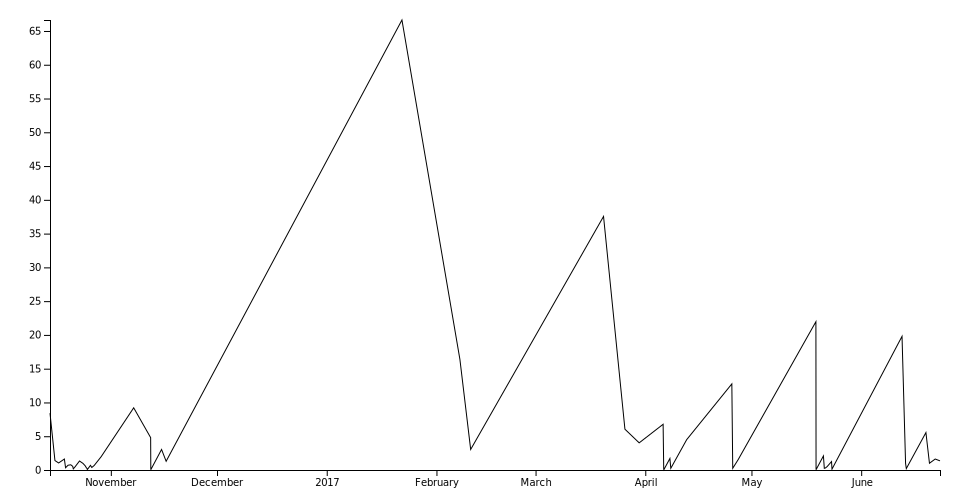

In [25]:
var execSync = require('child_process').execSync;
try {
    require.resolve('d3-node');
} catch (e) {
    execSync('npm install d3-node');
}

// subuffertract the events from the previous one, if it is greater than 1 months it can't help our graph
var contributing = [];
resultEvents.sort((a, b) => a.start - b.start);
resultEvents.forEach((e, i) => {
    if(i == 0) {
        return;
    }
    var diff = (e.start.getTime() - resultEvents[i - 1].start.getTime()) / 1000 / 60 / 60 / 24;
    //if(diff < 30 && diff > 0) {
        contributing[contributing.length] = {days: diff, start: e.start, event: e.event, i: contributing.length};
    //}
});

var D3Node = require('d3-node');
var d3n = new D3Node(); // initializes D3 with container element 
var d3 = d3n.d3;
console.log(contributing.map(e => e.days));

// set the dimensions and margins of the graph
var margin = {top: 20, right: 20, bottom: 30, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// set the ranges
var x = d3.scaleTime().range([0, width]);
var y = d3.scaleLinear().range([height, 0]);

// define the line
var valueline = d3.line()
    .x(function(d) { return x(d.start); })
    .y(function(d) { return y(d.days); });

// append the svg obgect to the body of the page
// appends a 'group' element to 'svg'
// moves the 'group' element to the top left margin
var svg = d3n.createSVG(width + margin.left + margin.right,
                        height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Get the data

// Scale the range of the data
x.domain(d3.extent(contributing, function(d) { return d.start; }));
y.domain([0, d3.max(contributing, function(d) { return d.days; })]);

// Add the valueline path.
svg.append("path")
  .data([contributing])
  .attr("class", "line")
    .attr("fill", "none")
    .attr("stroke", "#000")
  .attr("d", valueline);

// Add the X Axis
svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

// Add the Y Axis
svg.append("g")
  .call(d3.axisLeft(y));

$$.svg(d3n.svgString());